In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [4]:

# Function to fetch historical price data from Yahoo Finance
def get_ethereum_data():
    ethereum = yf.download('ETH-USD', start='2020-01-01', end='2023-01-01')
    return ethereum

# Function to calculate Exponential Moving Average (EMA)
def calculate_ema(data, column, window):
    return data[column].ewm(span=window, adjust=False).mean()

# Function to prepare data for training
def prepare_data(df, target_col='Close', window_size=10):
    data = df.copy()
    
    # Create lag features
    for i in range(1, window_size + 1):
        data[f'{target_col}_lag_{i}'] = data[target_col].shift(i)
    
    # Calculate 10-day Exponential Moving Average (EMA) as a feature
    data['EMA_10'] = calculate_ema(data, target_col, 10)
    
    data.dropna(inplace=True)
    
    return data

# Function to create and train the neural network
def create_train_model(X_train, y_train):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    return model

#Function to plot, box plot
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(12, 6))

    # Line plot for predictions vs actual values
    plt.subplot(1, 2, 1)
    plt.plot(y_true, label='Actual Prices', color='blue')
    plt.plot(y_pred, label='Predicted Prices', color='red')
    plt.title('ETH Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Box plot for actual and predicted prices
    plt.subplot(1, 2, 2)
    plt.boxplot([y_true.flatten(), y_pred.flatten()], labels=['Actual Prices', 'Predicted Prices'])
    plt.title('Box Plot of Actual and Predicted Prices')

    plt.tight_layout()
    plt.show()


[*********************100%***********************]  1 of 1 completed
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-11-16 22:29:44.361634: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-16 22:29:44.362269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-11-16 22:29:44.567332: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2023-11-16 22:29:44.852171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 11ms/step - loss: 0.1324
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 9.7961e-04
Epoch 4/50
28/28 [==============================] - 0s 8ms/step - loss: 5.6789e-04
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 4.3153e-04
Epoch 6/50
28/28 [==============================] - 0s 7ms/step - loss: 2.8818e-04
Epoch 7/50
28/28 [==============================] - 0s 8ms/step - loss: 2.3048e-04
Epoch 8/50
28/28 [==============================] - 0s 8ms/step - loss: 1.8640e-04
Epoch 9/50
28/28 [==============================] - 0s 7ms/step - loss: 1.8409e-04
Epoch 10/50
28/28 [==============================] - 0s 7ms/step - loss: 1.6819e-04
Epoch 11/50
28/28 [==============================] - 0s 6ms/step - loss: 1.8487e-04
Epoch 12/50
28/28 [==============================] - 0s 7ms/step - loss: 1.6333e-04
Epoch 13/50
28/28 [

2023-11-16 22:29:54.840366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


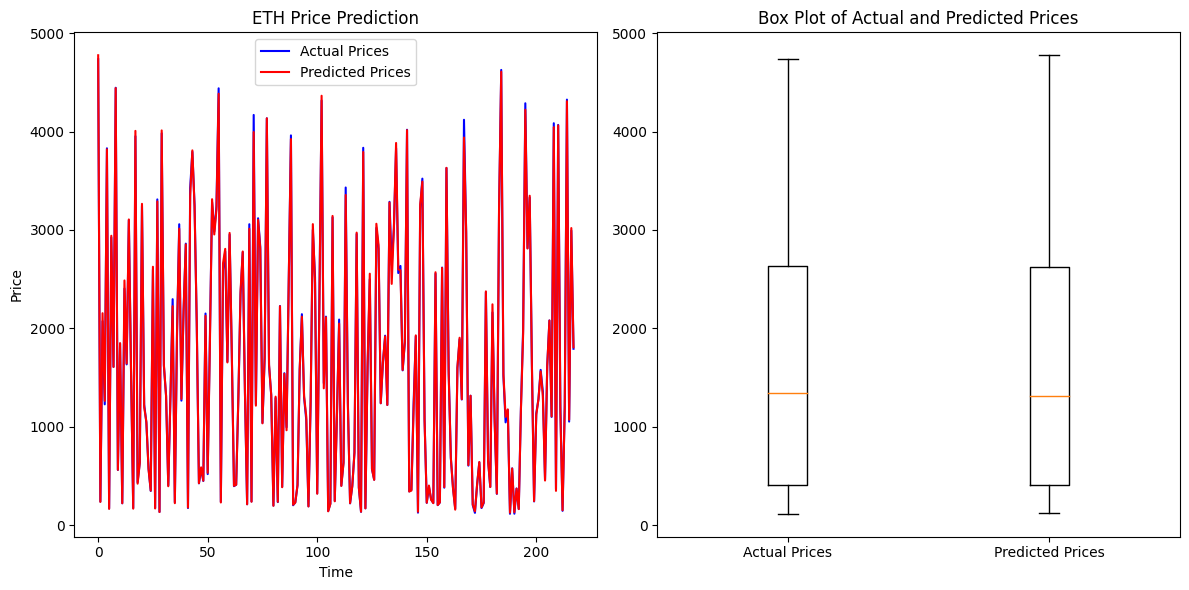

In [5]:
# Fetch historical ETH price data
ethereum_data = get_ethereum_data()

# Prepare data for training
window_size = 10
prepared_data = prepare_data(ethereum_data, window_size=window_size)

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(prepared_data.drop('Close', axis=1))
scaled_target = scaler.fit_transform(prepared_data['Close'].values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_data, scaled_target, test_size=0.2, random_state=42
)

# Create and train the neural network
model = create_train_model(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse transform to get original scale
y_test_original = scaler.inverse_transform(y_test)
predictions_original = scaler.inverse_transform(predictions)

# Plot predictions vs actual values
plot_predictions(y_test_original, predictions_original)

In [6]:
#Fetching recent prices for another testing 
test_data  = yf.download('ETH-USD', start='2023-01-01', end='2023-11-16')

# Prepare data for training
window_size = 10
prepared_test_data = prepare_data(test_data, window_size=window_size)

# Normalize data
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(prepared_test_data.drop('Close', axis=1))
scaled_Y = scaler.fit_transform(prepared_test_data['Close'].values.reshape(-1, 1))

[*********************100%***********************]  1 of 1 completed


In [7]:
new_predictions = model.predict(scaled_X)

10/10 [==============================] - 0s 4ms/step


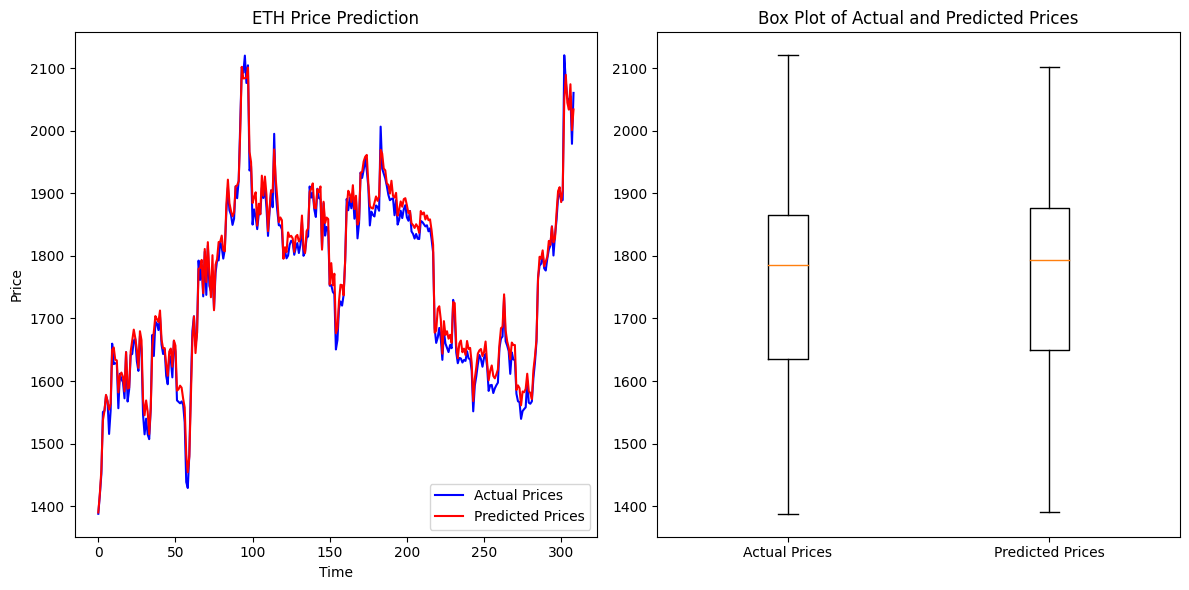

In [8]:
# Inverse transform to get original scale
y_test_original = scaler.inverse_transform(scaled_Y)
predictions_original = scaler.inverse_transform(new_predictions)

# Plot predictions vs actual values and box plot
plot_predictions(y_test_original, predictions_original)

In [10]:
#Find accuracy

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions_original)
mse_percentage = (mse / np.mean(y_test_original)) * 100
print(f'Mean Squared Error (%): {mse_percentage:.2f}%')


# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test_original, predictions_original)
mae_percentage = (mae / np.mean(y_test_original)) * 100
print(f'Mean Absolute Error (%): {mae_percentage:.2f}%')


Mean Squared Error (%): 17.01%
Mean Absolute Error (%): 0.81%


Accuracy = 82.99%